In [21]:
# imports
import ipywidgets as widgets
from ipywidgets.widgets import interact
import subprocess
import json

In [22]:
@interact(dataset=[("T1_T2", "T1_T2"), ("T2_T3", "T2_T3")])
def set_prediction_dataset(dataset:str="T1_T2") -> str:
    """
    Setting the dataset to be trained and evaluated on with a dropdown.

    Parmas:
        dataset (str, optional): Dataset to be trained and evaluated on. Defaults to "T1_T2".

    Returns:
        str: Dataset to be trained and evaluated on.
    """
    return dataset

interactive(children=(Dropdown(description='dataset', options=(('T1_T2', 'T1_T2'), ('T2_T3', 'T2_T3')), value=…

In [23]:
@interact(task=[("Conviction", "Conviction"), ("Weight", "Weight")])
def set_task(task:str="Conviction") -> str:
    """
    Setting the task to be trained and evaluated on with a dropdown.

    Parmas:
        task (str, optional): task to be trained and evaluated on. Defaults to "Conviction".

    Returns:
        str: task to be trained and evaluated on.
    """
    return task

interactive(children=(Dropdown(description='task', options=(('Conviction', 'Conviction'), ('Weight', 'Weight')…

In [24]:
prediction_goal = set_prediction_dataset()
task = set_task()

# Export notebook as python script to the ../python-code - folder

In [26]:
subprocess.run("jupyter nbconvert --output-dir='../python-code' --to python Main.ipynb --TemplateExporter.exclude_markdown=True --TemplateExporter.exclude_input_prompt=True", shell=True)

CompletedProcess(args="jupyter nbconvert --output-dir='../python-code' --to python Main.ipynb --TemplateExporter.exclude_markdown=True --TemplateExporter.exclude_input_prompt=True", returncode=0)

# Read in configuration file for setting best hyperparameter values


In [27]:
with open("config.json", "r") as c:
    config = json.loads(c.read())

# Prepare rating matrices for the different algorithms

In [28]:
# Parameters for executing the Rating-Matrix-Handler notebook
train_path = f"../../data/{prediction_goal}/train.csv"
test_path  = f"../../data/{prediction_goal}/test.csv"
validation_path = f"../../data/{prediction_goal}/validation.csv"
%run Rating_Matrix_Handler.ipynb

# Run the complete TLMF - algorithm

#### 1. Run the WTMF - notebook to compute the argument similarity matrix for the TLMF-algorithm

Error:3984.67	Current Iteration: 1\30
Error:1977.34	Current Iteration: 2\30
Error:1908.54	Current Iteration: 3\30
Error:1870.73	Current Iteration: 4\30
Error:1842.45	Current Iteration: 5\30
Error:1820.09	Current Iteration: 6\30
Error:1801.73	Current Iteration: 7\30
Error:1786.62	Current Iteration: 8\30
Error:1773.90	Current Iteration: 9\30
Error:1763.10	Current Iteration: 10\30
Error:1754.02	Current Iteration: 11\30
Error:1746.14	Current Iteration: 12\30
Error:1739.45	Current Iteration: 13\30
Error:1733.65	Current Iteration: 14\30
Error:1728.67	Current Iteration: 15\30
Error:1724.15	Current Iteration: 16\30
Error:1720.45	Current Iteration: 17\30
Error:1717.25	Current Iteration: 18\30
Error:1714.38	Current Iteration: 19\30
Error:1711.79	Current Iteration: 20\30
Error:1709.47	Current Iteration: 21\30
Error:1707.39	Current Iteration: 22\30
Error:1706.04	Current Iteration: 23\30
Error:1704.28	Current Iteration: 24\30
Error:1703.27	Current Iteration: 25\30
Error:1701.76	Current Iteration: 2

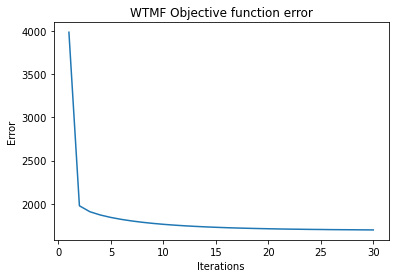

In [29]:
wtmf_config = config["hyperparameters"]["WTMF"][prediction_goal][task]
%run WTMF.ipynb

#### 2. Run the TLMF-notebook based on the calculated argument-similarity-matrix and the prepared argument-rating-matrix

In [30]:
 # params
wtmf=wtmf
rmh=rmh
tlmf_config = config["hyperparameters"]["TLMF"][prediction_goal][task]
%run TLMF.ipynb

Error:3984.67	Current Iteration: 1\30
Error:1977.34	Current Iteration: 2\30
Error:1908.54	Current Iteration: 3\30
Error:1870.73	Current Iteration: 4\30


# Run the TLMF algorithm powered by the BERT model

In [ ]:
%run BERT.ipynb
config_tlmf_bert = config["hyperparameters"]["TLMF_BERT"][prediction_goal][task]
%run TLMF.ipynb

# Run the complete I - AutoRec - algorithm

In [ ]:
i_autorec_config = config["hyperparameters"]["AutoRec"][prediction_goal][task]
%run AutoRec.ipynb

# Run the complete Naive Bayes - algorithm

In [ ]:
%run Naive_Bayes.ipynb